# Dimensionality Reduction, Clustering, and Cluster Interpretation

This tutorial uses the UCI drug consumption dataset:
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29  
Reference Source: George Chen(http://www.andrew.cmu.edu/user/georgech/)

Features included:   
NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity.

Note:   
All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued.

### Data Preprocessing

In [8]:
## Loading and preprocessing data
import csv
import numpy as np
np.set_printoptions(suppress=True)  # somewhat prettier printing

drug_data = []
with open('./drug_consumption.data', 'r') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    for row in csv_reader:
        # row[0] is an ID, which we ignore
        # row[1], row[2], ..., row[12] correspond to the 12 feature vectors we care about
        drug_data.append([float(x) for x in row[1:13]])
drug_data = np.array(drug_data)  # convert the data to be a numpy array

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Since different features have different scale, we need to standardize them first

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
drug_data_standardized = scaler.fit_transform(drug_data)
features = ['Age','Gender','Education','Country','Ethnicity','Neuroticism','Extraversion','Openness',
          'Agreeableness','Conscientiousness','impulsiveness',' sensation']

### Dimension Reduction with PCA

Next, use PCA to shrink down our dimensions from 12d to 2d.
The number of component is a hyperparameter, normally we shoud set it using cross-validation.
Here for simplicity, we set it to 2 directly. 

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
drug_data_pca = pca.fit_transform(drug_data_standardized)

We could plot the 2d representation of our data now.
In this step, we hope we could observe some clustering in our data after dimension reduction.

(-4.783449785487749, 5.246089512309561, -4.966350764806716, 5.092194624575614)

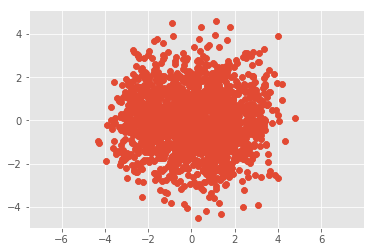

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(drug_data_pca[:,0],drug_data_pca[:,1],cmap='Set3')
plt.axis('equal')

Unfortunately, we couldn't see any clustering after PCA. One way to measure the effectiveness of PCA is its variance explained ratio: 
The first component explained 24% of variance of our data; the second component explained 15%.

In [12]:
pca.explained_variance_ratio_

array([0.24249161, 0.15598527])

We want to how each of these 12 features is weighted and added to get the first principal component axis:

In [27]:
# weight_first = pca.inverse_transform([1,0])
# plt.bar(range(len(weight_first)),weight_first)
# plt.yticks(range(len(features)),[f for f in features])
# ax.invert_yaxis()

### Dimension Reduction with t-SNE

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=123)
drug_data_tsne = tsne.fit_transform(drug_data_standardized)

Follow the same step, we want to plot our data after t-SNE.

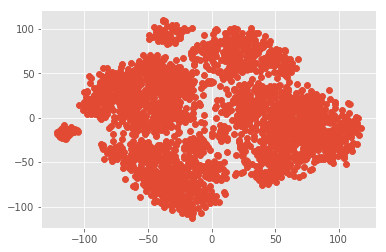

In [31]:
plt.scatter(drug_data_tsne[:,0],drug_data_tsne[:,1])

### Clustering with K-means

From the plot above, we could see there are six clusters in the plot.
Let's try k=6

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,n_init=1000, random_state=95865)
kmeans.fit(drug_data_tsne)
kmeans_cluster_assignment = kmeans.predict(drug_data_tsne)

After we know each point's assignment, we could plot all points' distribution

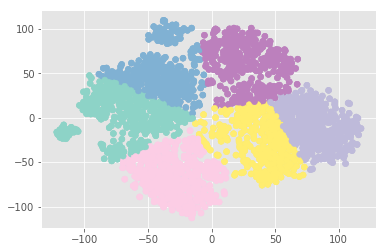

In [34]:
plt.scatter(drug_data_tsne[:,0],drug_data_tsne[:,1],c=[str(i) for i in kmeans_cluster_assignment],cmap='Set3')

### Cluster Interpretation

Once we know that our data could be clustered into 6 groups,
We also want to know:

1). does each cluster look different for each feature?
for example, do all clusters have same age distribution?

2). Some charasteristic of each cluster

In [39]:
drug_data[kmeans_cluster_assignment == cluster][:,:3]

array([[ 0.49788, -0.48246,  0.45468],
       [-0.95197, -0.48246, -1.22751],
       [ 0.49788, -0.48246, -1.7379 ],
       ...,
       [-0.07854, -0.48246, -0.61113],
       [-0.95197, -0.48246, -1.43719],
       [-0.95197,  0.48246, -0.61113]])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
D:\anaconda\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
D:\anaconda\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """


Text(0,0.5,'Feature value')

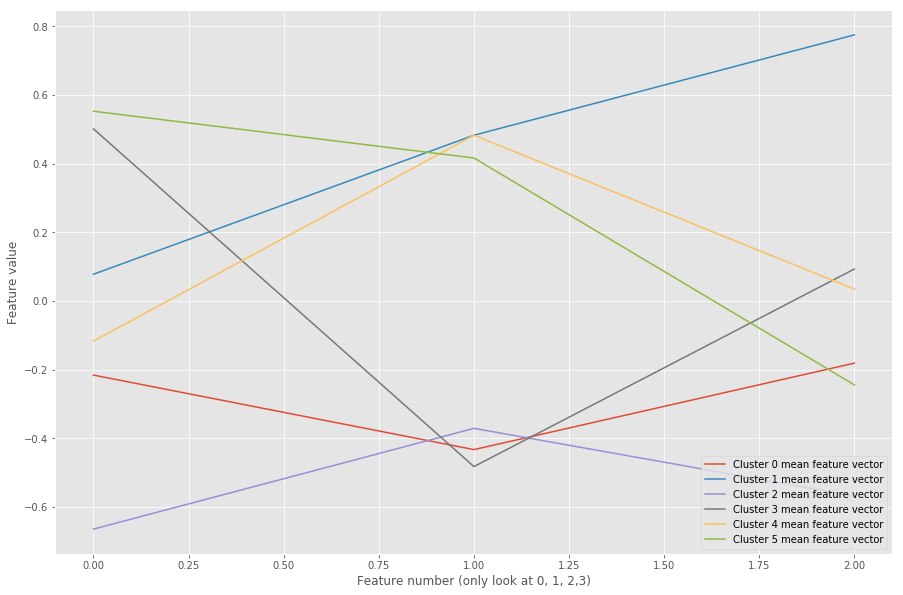

In [41]:
plt.figure(figsize=(15, 10))
plt.hold(True)
for cluster in range(kmeans_cluster_assignment.max() + 1):
    plt.plot(drug_data[kmeans_cluster_assignment == cluster][:,:3].mean(axis=0), label=('Cluster ' + str(cluster) +' mean feature vector'))
plt.hold(False)
plt.legend(loc='lower right')
plt.xlabel('Feature number (only look at 0, 1, 2,3)')
plt.ylabel('Feature value')

The plot above indicates that all clusters are different at feature1(age), so we want to know the
distribution of age in each cluster.

In [59]:
def plot_age(feature_value,labels):
    histogram = Counter()
    for val in feature_val:
        histogram[val] += 1
    sorted_val = sorted(list(histogram.items()))
    sorted_keys, sorted_value = zip(*sorted_val)
    plt.bar(range(len(sorted_value)),sorted_value)
    plt.xticks(range(len(sorted_keys)),[labels[key] for key in sorted_keys])

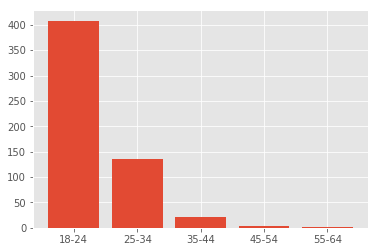

In [67]:
plot_age(drug_data[kmeans_cluster_assignment == 4][:, 0],
               {-0.95197: '18-24',
                -0.07854: '25-34',
                0.49788: '35-44',
                1.09449: '45-54',
                1.82213: '55-64',
                2.59171: '65+'})

This same idea can be used to examine distributions for other features and clusters.